In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data file 
file_path = "/Users/igmark/Desktop/WGU Data Files/D212_churn_clean.csv"
df = pd.read_csv(file_path)

In [3]:
#View first 5 rows of the dataframe 
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
#Statistics for Continuous Variables
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [5]:
#Detect missing values 
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [6]:
# Detect duplicated entries 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
#check for outliers and remove
print(df.shape)
df = df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]
print(df.shape)

(10000, 50)
(8950, 50)


In [8]:
data_orig = df.copy()

In [9]:
#View dataset columns 
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [10]:
#Remove unnesscary columns
df=df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'])

In [11]:
#View dataset columns after removal 
df.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'Children'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Income'}>],
       [<AxesSubplot: title={'center': 'Outage_sec_perweek'}>,
        <AxesSubplot: title={'center': 'Email'}>,
        <AxesSubplot: title={'center': 'Contacts'}>],
       [<AxesSubplot: title={'center': 'Yearly_equip_failure'}>,
        <AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'MonthlyCharge'}>],
       [<AxesSubplot: title={'center': 'Bandwidth_GB_Year'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

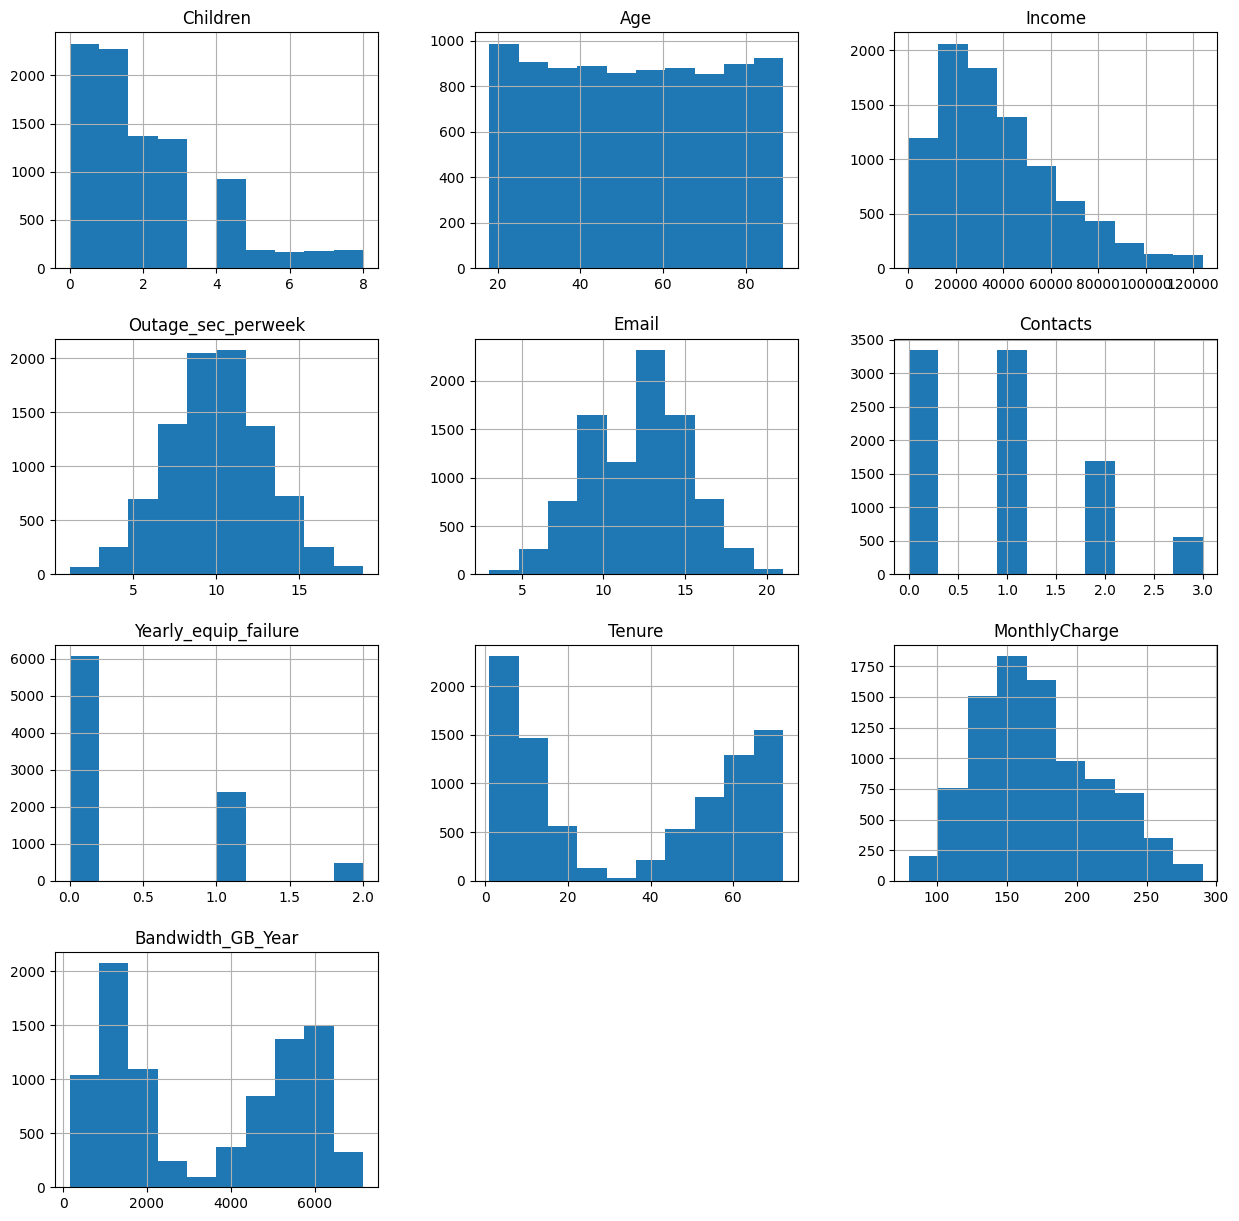

In [12]:
df.hist(figsize = (15,15))

<AxesSubplot: >

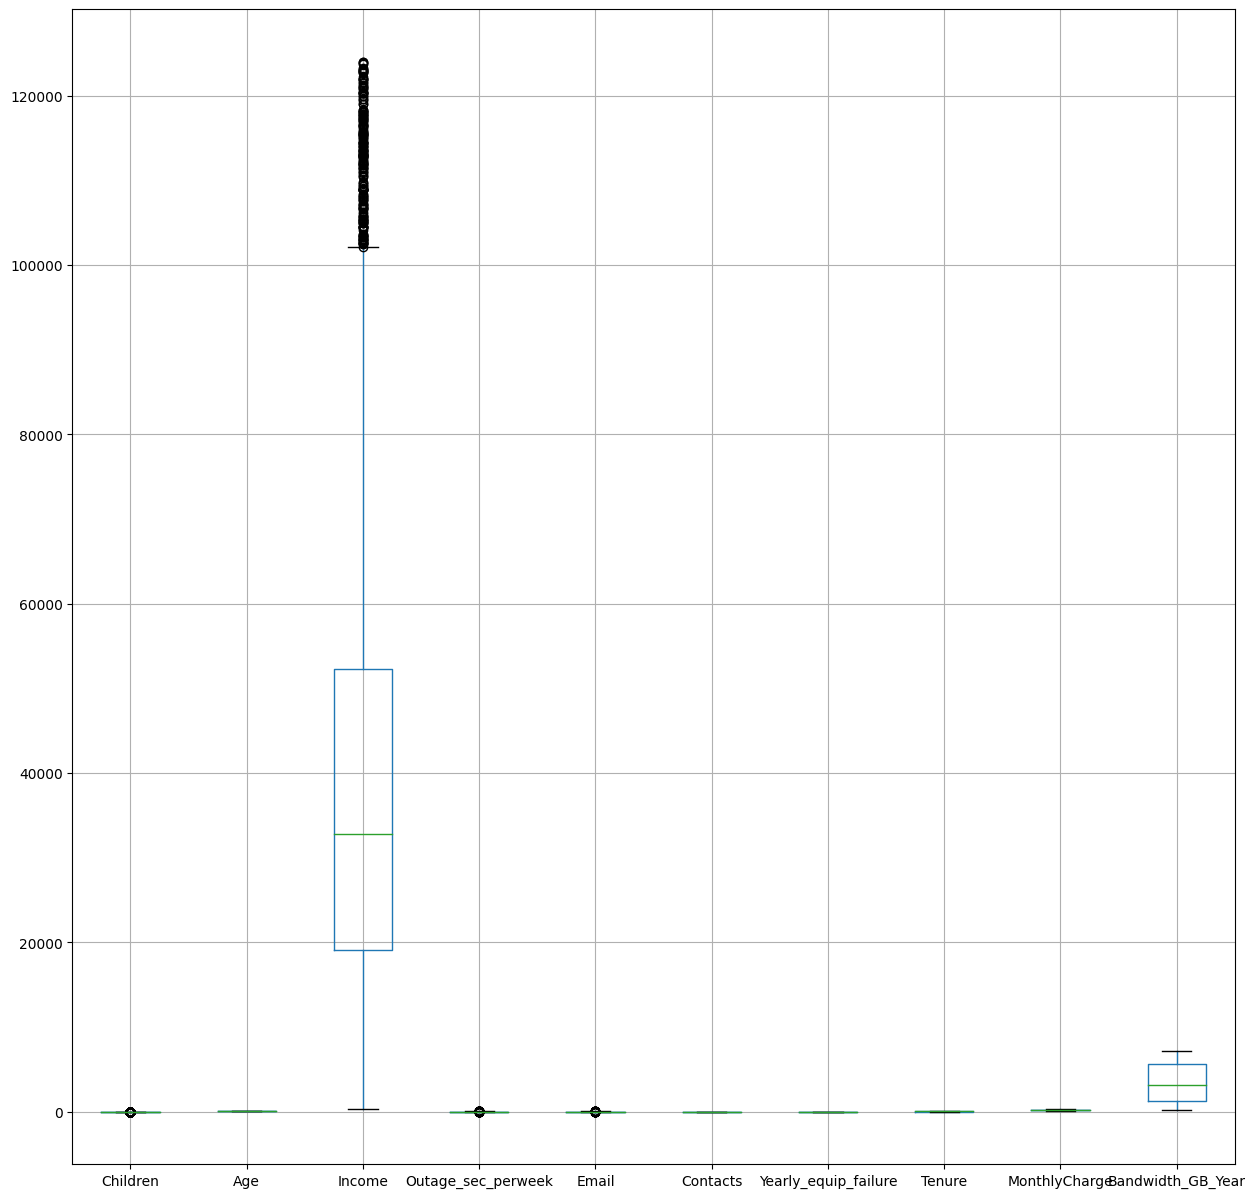

In [13]:
df.boxplot(figsize = (15,15))

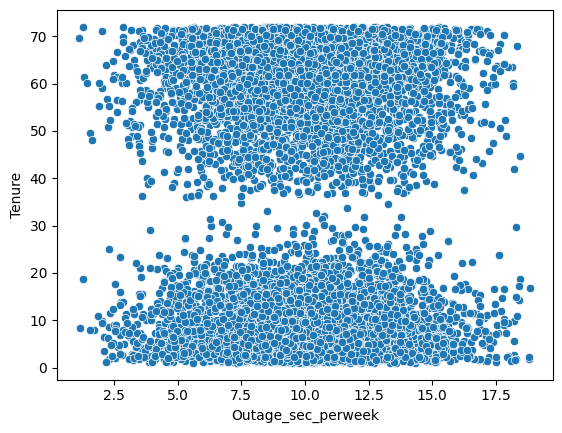

In [14]:
sns.scatterplot(x=df['Outage_sec_perweek'],y=df['Tenure'])
plt.show()

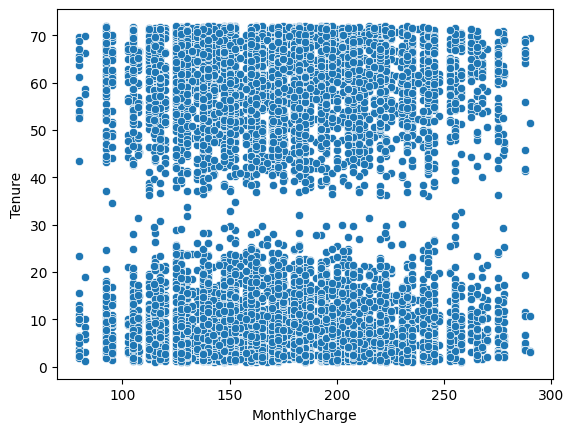

In [15]:
sns.scatterplot(x=df['MonthlyCharge'],y=df['Tenure'])
plt.show()

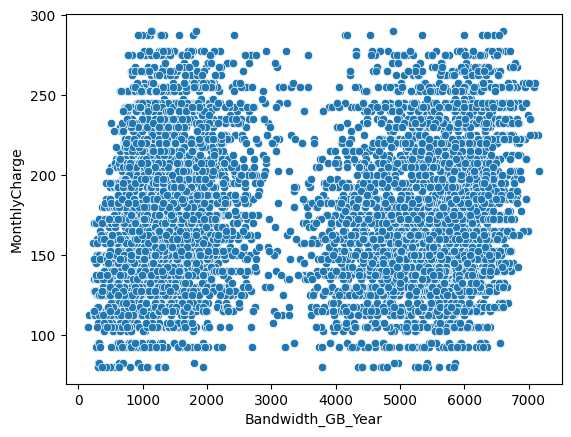

In [16]:
sns.scatterplot(x=df['Bandwidth_GB_Year'],y=df['MonthlyCharge'])
plt.show()

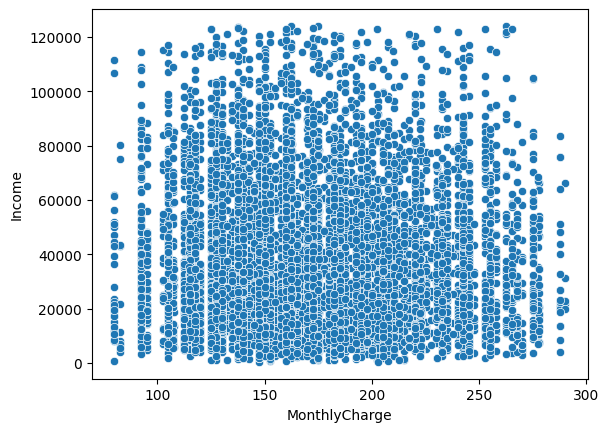

In [17]:
sns.scatterplot(x=df['MonthlyCharge'],y=df['Income'])
plt.show()

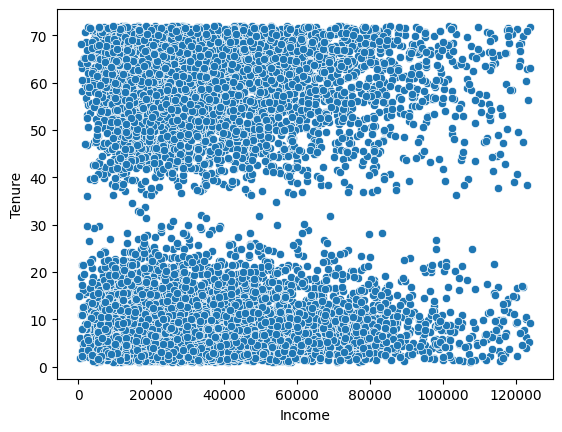

In [18]:
sns.scatterplot(x=df['Income'],y=df['Tenure'])
plt.show()

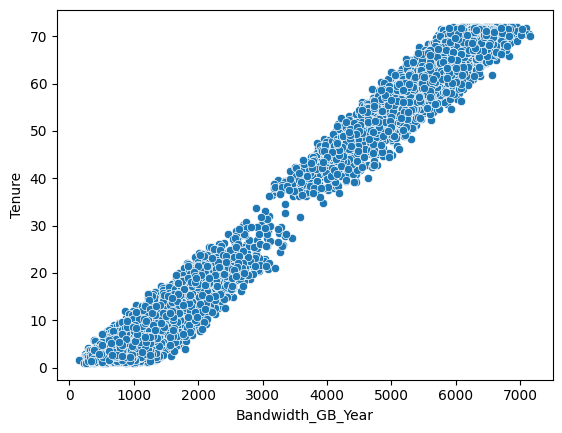

In [19]:
sns.scatterplot(x=df['Bandwidth_GB_Year'],y=df['Tenure'])
plt.show()

### Standarad Scaler

In [20]:
sc = StandardScaler()
sc.fit(df)
scaled_data_array = sc.transform(df)
scaled_data = pd.DataFrame(scaled_data_array, columns = df.columns)
scaled_data.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.497975,-1.267929,-0.661753,0.577519,-0.007198,-1.045438,1.072633,-1.258019,1.624861,-1.180036
1,1.088855,-0.153217,-1.143209,0.254153,-1.003385,-1.045438,1.072633,-0.706000,-0.298598,-0.606271
2,-0.497975,-0.250148,-0.772394,1.675978,0.988989,1.174939,-0.642890,-0.655588,-1.228882,-0.555988
3,-1.026918,1.446153,0.069452,-0.636170,1.321052,1.174939,1.072633,-1.238570,-0.531205,-1.422357
4,0.559911,1.446153,-0.623721,-0.542683,0.988989,2.285128,1.072633,-1.037010,0.284363,-1.070944


In [21]:
#Save to new file 
df.to_csv('D212_prepared_task1_updated.csv')

# K-Means Clustering

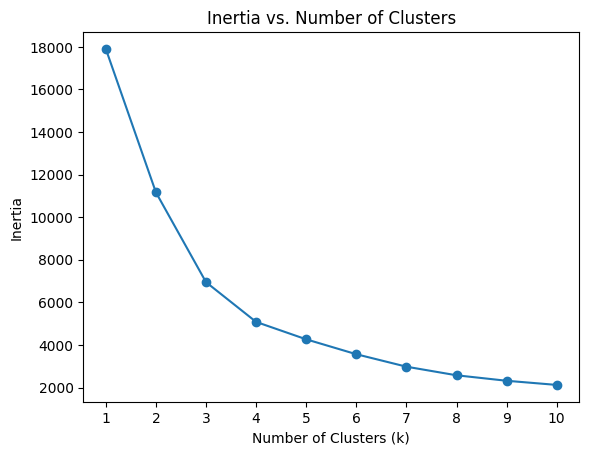

In [22]:
selected_columns = ['Age','MonthlyCharge']
selected_data = scaled_data[selected_columns]

ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(selected_data)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.xticks(ks)
plt.show()


In [23]:
#performs k-means clustering
model = KMeans(n_clusters=3)
model.fit(selected_data)
print(model.labels_)

[2 0 0 ... 0 2 2]


In [24]:
#coordinates of the centers of the clusters obtained after fitting the KMeans model on the data. 
model.cluster_centers_

array([[-0.89195514, -0.4747702 ],
       [ 0.91748404, -0.46470801],
       [ 0.03344858,  1.31965263]])

For n_clusters = 2, the silhouette score is 0.3619901147641166
For n_clusters = 3, the silhouette score is 0.391951046190778
For n_clusters = 4, the silhouette score is 0.3796106378426412
For n_clusters = 5, the silhouette score is 0.34865292571550777
For n_clusters = 6, the silhouette score is 0.3521471054503823
For n_clusters = 7, the silhouette score is 0.3505623359505104
For n_clusters = 8, the silhouette score is 0.3501940465501092
For n_clusters = 9, the silhouette score is 0.3543579240770377
For n_clusters = 10, the silhouette score is 0.35213649949584175


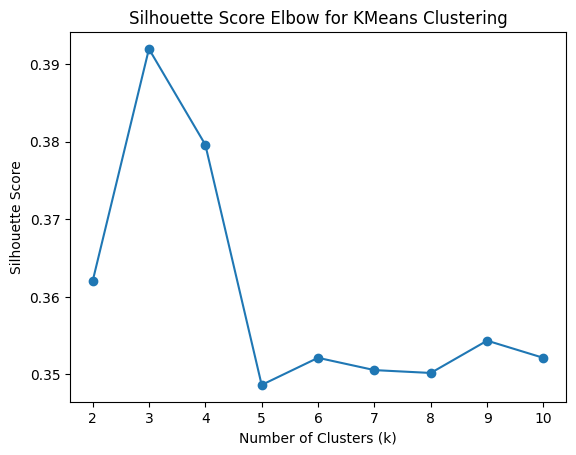

In [25]:
ks = range(2, 11)
sil_scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(selected_data)
    labels = model.labels_
    sil_score = silhouette_score(selected_data, labels)
    sil_scores.append(sil_score)
    print(f"For n_clusters = {k}, the silhouette score is {sil_score}")

# Plot the Silhouette Score Elbow
plt.plot(ks, sil_scores, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Elbow for KMeans Clustering')
plt.xticks(ks)
plt.show()


Average silhouette score: 0.391951046190778


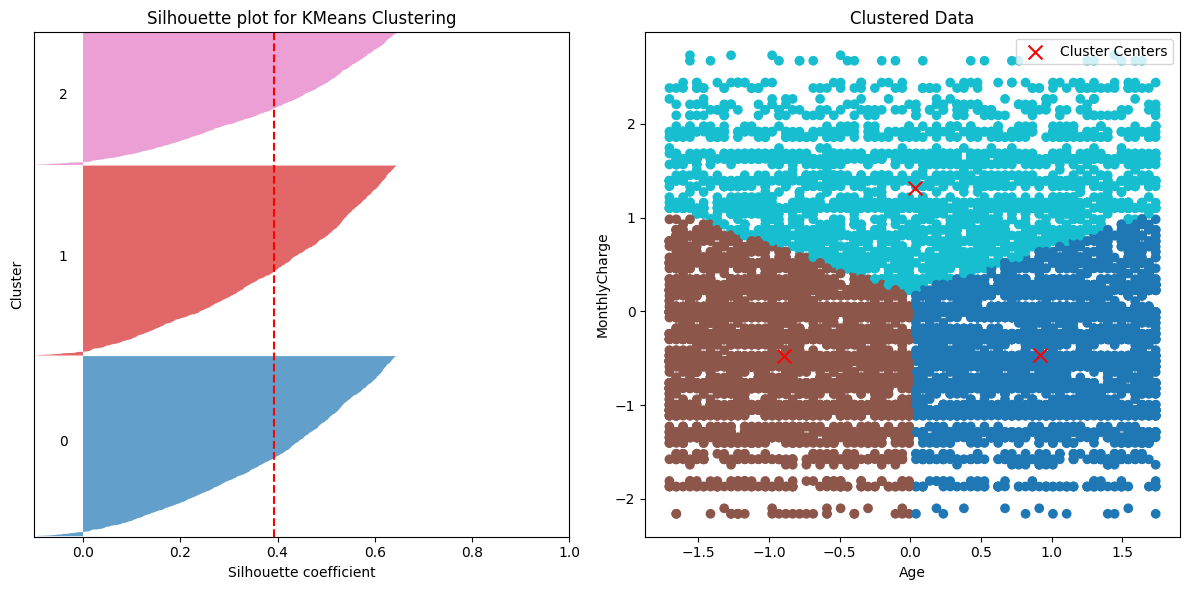

In [26]:
selected_columns = ['Age', 'MonthlyCharge']
selected_data = scaled_data[selected_columns]

k = 3  # Number of clusters

# Perform KMeans clustering
model = KMeans(n_clusters=k)
labels = model.fit_predict(selected_data)

# Calculate silhouette scores
silhouette_vals = silhouette_samples(selected_data, labels)

# Sort the silhouette scores and cluster labels
sorted_vals = silhouette_vals.argsort()
sorted_labels = labels[sorted_vals]

# Compute the silhouette score for the entire dataset
silhouette_avg = silhouette_vals.mean()
print("Average silhouette score:", silhouette_avg)

# Create a subplot with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Set the limits of the y-axis for individual silhouette plots
y_lower = 10

# Iterate over clusters to create silhouette plots
for i in range(k):
    # Aggregate the silhouette scores for samples in the cluster
    cluster_vals = silhouette_vals[sorted_labels == i]
    cluster_size = cluster_vals.shape[0]
    
    # Sort the silhouette scores within the cluster
    cluster_vals.sort()

    # Calculate the upper limit of the silhouette plot for the cluster
    y_upper = y_lower + cluster_size

    # Fill the silhouette plot with the corresponding cluster color
    color = plt.cm.get_cmap("tab10")(float(i) / k)
    ax[0].fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, facecolor=color, alpha=0.7)

    # Label the silhouette plot with the cluster number
    ax[0].text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    
    # Update the lower limit of the y-axis for the next cluster plot
    y_lower = y_upper + 10  
    
     
# Set labels and limits for the silhouette plot
ax[0].set_xlabel("Silhouette coefficient")
ax[0].set_ylabel("Cluster")
ax[0].set_title("Silhouette plot for KMeans Clustering")
ax[0].set_xlim([-0.1, 1])
ax[0].set_ylim([0, len(selected_data) + (k + 1) * 10])

# Draw a vertical line at the average silhouette score
ax[0].axvline(x=silhouette_avg, color="red", linestyle="--")
ax[0].set_yticks([])  # Clear y-axis ticks


# Plot the cluster centers
cluster_centers = model.cluster_centers_
ax[1].scatter(selected_data['Age'], selected_data['MonthlyCharge'], c=labels, cmap='tab10')
ax[1].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='x', color='red', s=100, label='Cluster Centers')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('MonthlyCharge')
ax[1].set_title('Clustered Data')
ax[1].legend()

plt.tight_layout()
plt.show()


In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate WCSS/Inertia
wcss = model.inertia_

# Calculate Silhouette Score
labels = model.labels_
silhouette_avg = silhouette_score(selected_data, labels)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(selected_data, labels)

# Print the metrics
print("WCSS/Inertia:", wcss)
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)


WCSS/Inertia: 6948.375346308352
Silhouette Score: 0.391951046190778
Davies-Bouldin Index: 0.8524936873924814
